In [6]:
######## Olympics data gotten from kaggle
############ Toby Agomuo Refresher



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
data = pd.read_csv(r"E:\DataAnalysis\Analysis2\archive\athlete_events.csv")
region = pd.read_csv(r"E:\DataAnalysis\Analysis2\archive\noc_regions.csv")


In [10]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [11]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [12]:
############ joining the data frames
data_df = data.merge(region, how = 'left', on = 'NOC')
data_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [14]:
data_df.shape

(271116, 17)

In [16]:
data_df.rename(columns={'region': 'Region', 'notes': 'Notes'}, inplace =True)
data_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [17]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [18]:
data_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [19]:
nan = data_df.isna()
nan_columns = nan.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [20]:
data_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [21]:
####### Olympic athletes from canada
data_df.query("Team == 'Canada'").head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
269,140,"William ""Bill"" Abbott Jr.",M,42.0,172.0,80.0,Canada,CAN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Mixed Three Person Keelboat,NaN,Canada,NaN
270,140,"William ""Bill"" Abbott Jr.",M,46.0,172.0,80.0,Canada,CAN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Mixed Three Person Keelboat,NaN,Canada,NaN
279,146,Jeremy Abbott,M,19.0,179.0,71.0,Canada,CAN,1976 Summer,1976,Summer,Montreal,Canoeing,"Canoeing Men's Canadian Doubles, 1,000 metres",NaN,Canada,NaN
280,147,Joanne Abbott,F,41.0,160.0,57.0,Canada,CAN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Mixed Three Person Keelboat,NaN,Canada,NaN
281,148,"Kathryn ""Katie"" Abbott",F,21.0,164.0,63.0,Canada,CAN,2008 Summer,2008,Summer,Beijing,Sailing,Sailing Women's Three Person Keelboat,NaN,Canada,NaN


In [22]:
####### Olympic athletes from Nigeria
data_df.query("Team == 'Nigeria'").head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
211,101,Adeyemi Abayomi,M,25.0,170.0,51.0,Nigeria,NGR,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Lightweight,NaN,Nigeria,NaN
544,313,"Lawal Kolawole ""Kola"" Abdulai",M,21.0,172.0,66.0,Nigeria,NGR,1968 Summer,1968,Summer,Mexico City,Athletics,Athletics Men's 100 metres,NaN,Nigeria,NaN
545,313,"Lawal Kolawole ""Kola"" Abdulai",M,21.0,172.0,66.0,Nigeria,NGR,1968 Summer,1968,Summer,Mexico City,Athletics,Athletics Men's 4 x 100 metres Relay,NaN,Nigeria,NaN
546,313,"Lawal Kolawole ""Kola"" Abdulai",M,25.0,172.0,66.0,Nigeria,NGR,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's 100 metres,NaN,Nigeria,NaN
547,313,"Lawal Kolawole ""Kola"" Abdulai",M,25.0,172.0,66.0,Nigeria,NGR,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's 4 x 100 metres Relay,NaN,Nigeria,NaN


In [26]:
######## Top countries 
top_countries = data_df.Team.value_counts().sort_values(ascending=False).head(10)
top_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

In [27]:
######## Top Medals 
top_medals = data_df.Medal.value_counts().sort_values(ascending=False).head(10)
top_medals

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [28]:

######## Top 10 African Countries according to medals

<AxesSubplot:title={'center':'Overall Participation by Country'}, ylabel='Team'>

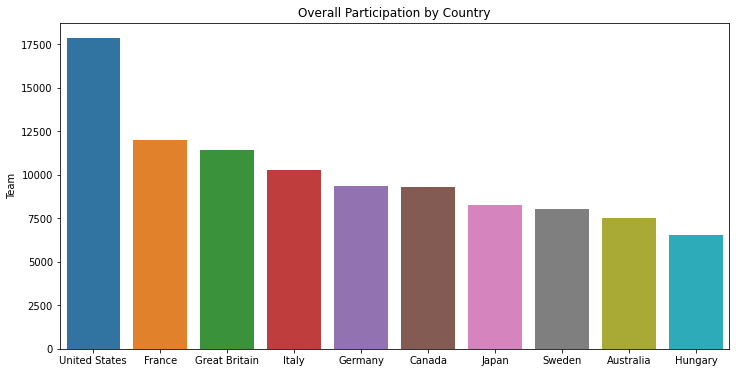

In [32]:
######## Top Countries according to medals
plt.figure(figsize=(12,6))
plt.title('Overall Participation by Country')
sns.barplot(x=top_countries.index, y=top_countries )

(array([1.4000e+01, 2.2600e+02, 3.0400e+03, 9.2280e+03, 1.9795e+04,
        3.4422e+04, 4.2689e+04, 4.1427e+04, 3.3700e+04, 2.5506e+04,
        1.7047e+04, 1.1046e+04, 7.1180e+03, 4.4560e+03, 3.0170e+03,
        2.1630e+03, 1.6590e+03, 1.2670e+03, 8.3700e+02, 7.6900e+02,
        4.7700e+02, 4.4400e+02, 2.6600e+02, 2.0000e+02, 1.7100e+02,
        1.5600e+02, 1.1800e+02, 1.1400e+02, 5.6000e+01, 8.5000e+01,
        6.1000e+01, 3.2000e+01, 1.6000e+01, 9.0000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <BarContainer object of 34 artists>)

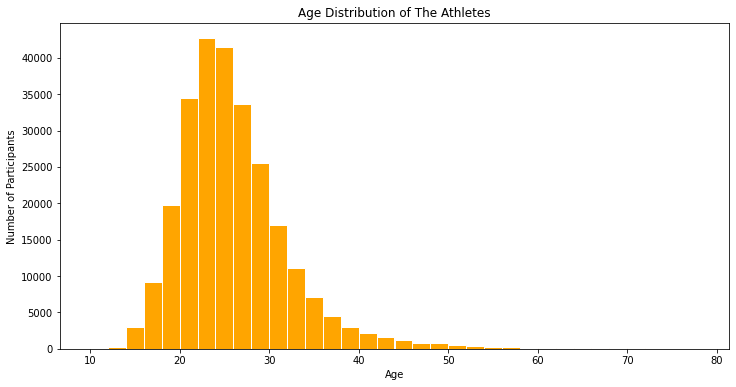

In [34]:
## Age distribution of the participant
plt.figure(figsize=(12,6))
plt.title('Age Distribution of The Athletes')
plt.xlabel ('Age')
plt.ylabel ('Number of Participants')
plt.hist(data_df.Age, bins = np.arange(10,80,2), color ='orange', edgecolor='white')

In [35]:
##### Winter Olympics
winter = data_df[data_df.Season == 'Winter'].Sport.unique()
winter

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [37]:
##### Summer Olympics
summer = data_df[data_df.Season == 'Summer'].Sport.unique()
summer

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [38]:
########## Male and Female particpants since 1896 till 2016
gender = data_df.Sex.value_counts()
gender

M    196594
F     74522
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x2329b549b88>,
 [Text(0.20089640434146097, -1.081499253223354, 'M'),
  Text(-0.2008963030841931, 1.081499272032628, 'F')],
 [Text(0.10957985691352415, -0.5899086835763748, '72.5%'),
  Text(-0.10957980168228713, 0.5899086938359788, '27.5%')])

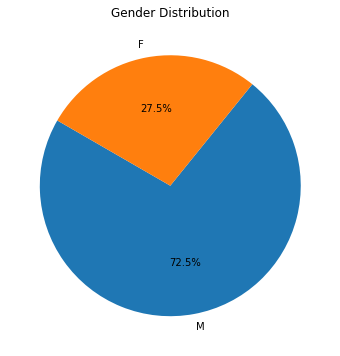

In [41]:
############# Plotting a pie chart for both male and female athletes 
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender, labels =gender.index, autopct='%1.1f%%', startangle=150, )

In [42]:
##### Total medal won
data_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [44]:
######### Total number of female participants
female = data_df[(data_df.Sex=='F') & (data_df.Season =='Summer')][['Sex','Year']]
female = female.groupby('Year').count().reset_index()
female.head()

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


In [45]:
wOlympics =data_df[(data_df.Sex == 'F') & (data_df.Season == 'Summer')]


Text(0.5, 1.0, 'Women Participation')

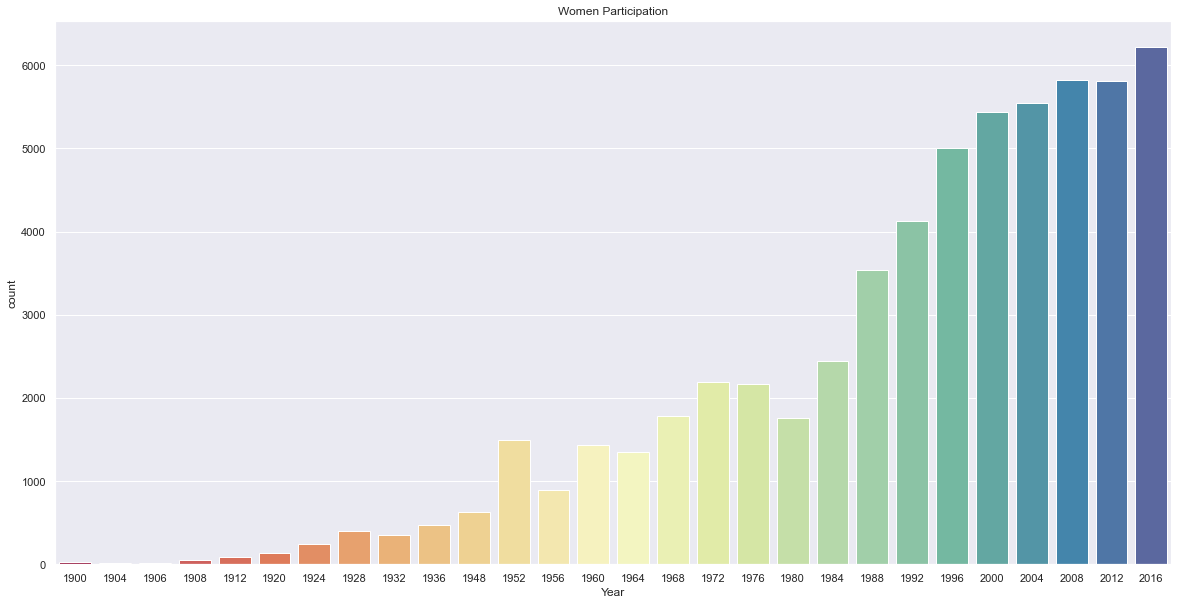

In [47]:
###### Visualizing female participation in the olympics since its inception

sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data=wOlympics, palette='Spectral')
plt.title('Women Participation')

In [76]:
######## Gold Medal athletes

gold = data_df[(data_df.Medal == 'Gold')]
gold.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [77]:
gold.Region.value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575


Text(0.5, 1.0, 'Gold Medal Per Country')

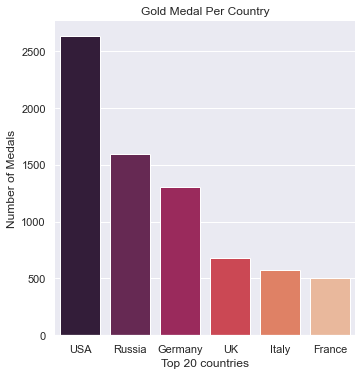

In [84]:
totalgold = gold.Region.value_counts().reset_index(name='Medal').head(6)
g = sns.catplot(x='index', y='Medal', data=totalgold, height=5, kind='bar', palette='rocket')
g.despine(left=True)
g.set_xlabels('Top 6 countries')
g.set_ylabels('Number of Medals')
plt.title('Gold Medal Per Country')

In [87]:
############## Most recent Olympics in data set
maxYear = data_df.Year.max()
print(maxYear)
team_names = data_df[(data_df.Year == maxYear) & (data_df.Medal == 'Gold') ].Team

team_names.value_counts().head(10)

2016


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

Text(0.5, 0, 'Countrywise medals for Rio 2016 Olympics')

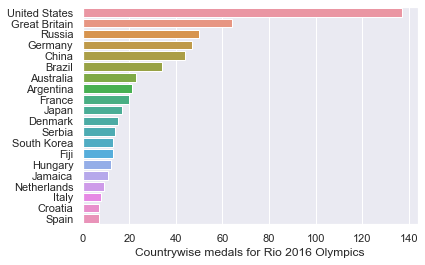

In [88]:
sns.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index)

plt.ylabel(None)
plt.xlabel('Countrywise medals for Rio 2016 Olympics')